In [1]:
"""
Our database's size should not be less than 10 times the number of links between neurons]
330 links or less
"""

"\nOur database's size should not be less than 10 times the number of links between neurons]\n330 links or less\n"

In [ ]:
"""
THIS IS A SAMPLE NEURAL NETWORK WITH SCIKIT LEARN:
"""

In [2]:
from sklearn.neural_network import MLPClassifier
X = [[0.,0.,0.],[0.,0.,0.],[1.,1.,1.],[1.,1.,1.],[1.,1.,1.]]
y = [0.,0.,1.,1.,1.]

In [3]:
clf = MLPClassifier(solver = 'adam', alpha =1e-5, hidden_layer_sizes=(5,2),random_state=1,learning_rate='adaptive')
for i in range(10):
    clf.fit(X,y)

In [4]:
clf.predict([1.,1.,0.])

/Users/cliang/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])

In [ ]:
"""
THIS IS A SAMPLE NEURAL NETWORK WITH KERAS, USING TENSORFLOW AS A BACKEND
"""

In [1]:
# SUPPRESS ALL WARNINGS:
import warnings
warnings.filterwarnings("ignore")

# IMPORT MODUELS

import csv              # Used to read CSV files

import time             # Keep track of time

import matplotlib.pyplot as plt     # Generating 2D charts

import keras            # Used for neural network
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras import optimizers        # Used for optimization

import numpy as np      # Used to analyze data and arrays
import random

Using TensorFlow backend.


Train on 90 samples, validate on 10 samples
Epoch 1/1000
90/90 [==============================] - 1s - loss: 0.6931 - acc: 0.5222 - val_loss: 0.6993 - val_acc: 0.0000e+00
Epoch 2/1000
90/90 [==============================] - 0s - loss: 0.6920 - acc: 0.5556 - val_loss: 0.7024 - val_acc: 0.0000e+00
Epoch 3/1000
90/90 [==============================] - 0s - loss: 0.6912 - acc: 0.5556 - val_loss: 0.7054 - val_acc: 0.0000e+00
Epoch 4/1000
90/90 [==============================] - 0s - loss: 0.6900 - acc: 0.5556 - val_loss: 0.7078 - val_acc: 0.0000e+00

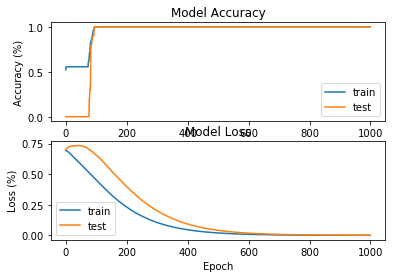

In [6]:
# Database
X = []

for i in range(50):
    temp = []
    for k in range(2):
        temp.append(random.uniform(0,3))
    X.append(temp)
    
for i in range(50):
    temp = []
    for k in range(2):
        temp.append(random.uniform(7,10))
    X.append(temp)


# Target
Y = []

for i in range(50):
    Y.append(1)
for i in range(50):
    Y.append(0)

    
# Build neural network
# Sequential
model = Sequential()
#model = load_model('my_model1.h5')

# Neural network
model.add(Dense(3, input_dim=2, init='uniform', activation='sigmoid' ))
model.add(Dense(1, init='uniform', activation='sigmoid'))

start  = time.time()

# Compile model
sgd = optimizers.SGD(lr=0.0001, decay=1e-10, momentum=0.01, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Fit model
history = model.fit(X, Y, nb_epoch=1000, validation_split=0.1, batch_size=10)

end = time.time()

elapsed = end - start

print("ELAPSED TIME:", elapsed)



# Analysis
# Plot data
        # Using matplotlib, plot success rate (2 axis chart with selected data)
plt.figure(1)
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel("Epoch")
plt.legend(['train', 'test'], loc='lower right')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss (%)')
plt.xlabel("Epoch")
plt.legend(['train', 'test'], loc='lower left')
plt.show()

model.save('my_model1.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model
